### Parker Banks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Question 2

In [2]:
def forward_euler(s_vec, i_vec, p_vec, omega_vec, gamma_vec, c_mat, dt):
    """
        Calculates a step in a function using the forward euler method.
        
        s_vec: vector of susceptible values for m populations
        i_vec: vector of infected values for m populations
        p_vec: vector of prob(infection | contact) values for m populations
        omega_vec: vector of N_m / N values for m populations
        gamma_vec: vector of recovery rates for m populations
        c_mat: contact matrix for m populations
        dt: time step
        
        Returns: New s values and i values for m populations, time dt later
    """
    coef_mat = np.dot(np.dot(np.dot(np.diag(s_vec), np.diag(p_vec)), c_mat), np.linalg.inv(np.diag(omega_vec)))

    s_dot_vec = - np.dot(coef_mat, i_vec)
    i_dot_vec = np.dot(coef_mat, i_vec) - np.dot(np.diag(gamma_vec), i_vec)

    s_next_vec = s_vec + (s_dot_vec * dt)
    i_next_vec = i_vec + (i_dot_vec * dt)

    return s_next_vec, i_next_vec

def calc_avg_susceptibility(t_vals, p_vec, s_vals):
    p_avg_vals = []

    for t_ind in range(len(t_vals)):
        p_avg_vals.append(sum([p_vec[i] * s_vals[:, i][t_ind] for i in range(4)]) / sum([s_vals[:, i][t_ind] for i in range(4)]))
                               
    return p_avg_vals

In [3]:
# initialize known values
s_vec = np.array([0.999, 0.999, 0.999, 0.999])
i_vec = np.array([0.001, 0.001, 0.001, 0.001])
p_vec = np.array([1, 2, 3, 4])
omega_vec = np.array([0.25, 0.25, 0.25, 0.25])
gamma_vec = np.array([3, 3, 3, 3])
c_mat = np.array([
    [9/20, 9/20, 9/20, 9/20],
    [9/20, 9/20, 9/20, 9/20],
    [9/20, 9/20, 9/20, 9/20],
    [9/20, 9/20, 9/20, 9/20]
])

dt = 0.01
total_time = 3
iterations = int(total_time / dt)

# running simulation
s_vals = s_vec
i_vals = i_vec
for i in range(iterations - 1):
    s_vec, i_vec = forward_euler(s_vec, i_vec, p_vec, omega_vec, gamma_vec, c_mat, dt)
    s_vals = np.vstack((s_vals, s_vec))
    i_vals = np.vstack((i_vals, i_vec))    

# Number of lines
num_lines = len(i_vals[0])
t_vals = np.linspace(0, total_time, iterations)

# calculating average susceptibility
p_avg_vals = calc_avg_susceptibility(t_vals, p_vec, s_vals)

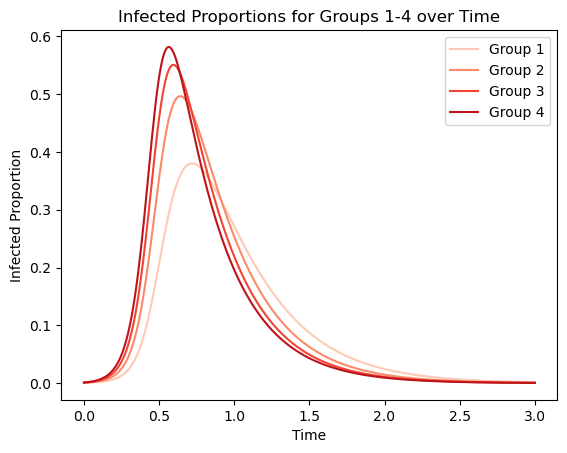

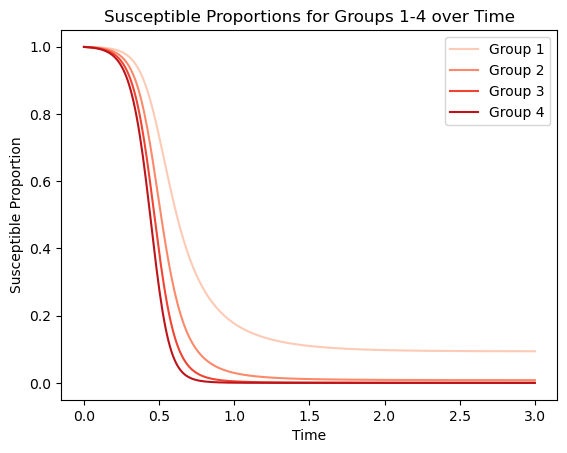

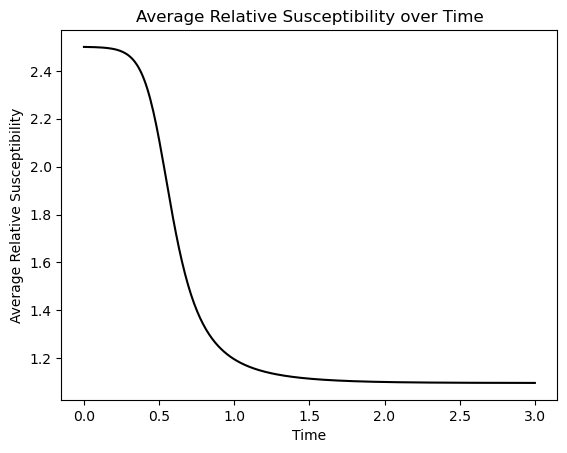

In [4]:
# Create a color palette with successive lighter hues of red
colors = sns.color_palette("Reds", n_colors=num_lines)

# Plotting
for ind in range(num_lines):
    i = i_vals[:, ind]
    plt.plot(t_vals, i, label=f"Group {ind + 1}", color=colors[ind])

# Set plot labels and title
plt.xlabel("Time")
plt.ylabel("Infected Proportion")
plt.title("Infected Proportions for Groups 1-4 over Time")

# Display legend
plt.legend()

# Show the plot
plt.show()
plt.close()

# Plotting
for ind in range(num_lines):
    s = s_vals[:, ind]
    plt.plot(t_vals, s, label=f"Group {ind + 1}", color=colors[ind])

# Set plot labels and title
plt.xlabel("Time")
plt.ylabel("Susceptible Proportion")
plt.title("Susceptible Proportions for Groups 1-4 over Time")

# Display legend
plt.legend()

# Show the plot
plt.show()
plt.close()

# Plotting
plt.plot(t_vals, p_avg_vals, color="black")

# Set plot labels and title
plt.xlabel("Time")
plt.ylabel("Average Relative Susceptibility")
plt.title("Average Relative Susceptibility over Time")

# Show the plot
plt.show()

In [5]:
print(s_vals[:, 0][-1])

0.0941290924908063


# Question 3

In [7]:
from scipy.stats import nbinom

def simulate_branching_process(R0, k, max_generations, num_simulations):
    mean = R0
    variance = mean + (mean**2) / k
    p = mean / variance
    n = mean**2 / (variance - mean)
    
    extinct_count = 0
    for _ in range(num_simulations):
        infections = 1  # Start with a single infection
        for _ in range(max_generations):
            # negligible chance of dying out at 2^9 infections
            if infections > 2 ** 9:
                break
            # Simulate number of new infections in this generation
            new_infections = nbinom.rvs(n=n, p=p, size=infections)
            infections = new_infections.sum()  # Total number of new infections
            
            if infections == 0:
                extinct_count += 1
                break  # Epidemic dies out

    extinction_probability = extinct_count / num_simulations
    return extinction_probability

# Parameters
R0_values = [3]
k_values = [0.1, 0.5, 1.0, 5.0, 10.0]
max_generations = 1000
num_simulations = 10000


# Simulate and estimate extinction probability for each value of k
for k in k_values:
    extinction_probability = simulate_branching_process(R0_values[0], k, max_generations, num_simulations)
    print(f"k: {k}, extinction_probability: {extinction_probability}")

k: 0.1, extinction_probability: 0.838
k: 0.5, extinction_probability: 0.4997
k: 1.0, extinction_probability: 0.3359
k: 5.0, extinction_probability: 0.1207
k: 10.0, extinction_probability: 0.0878


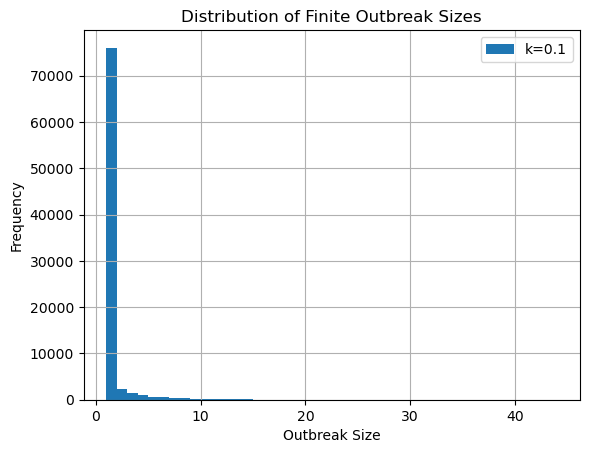

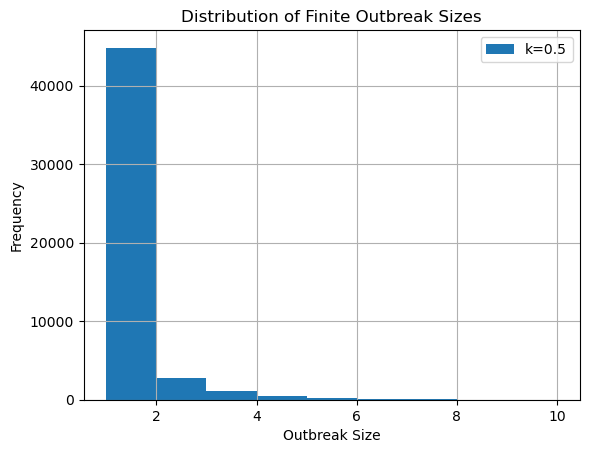

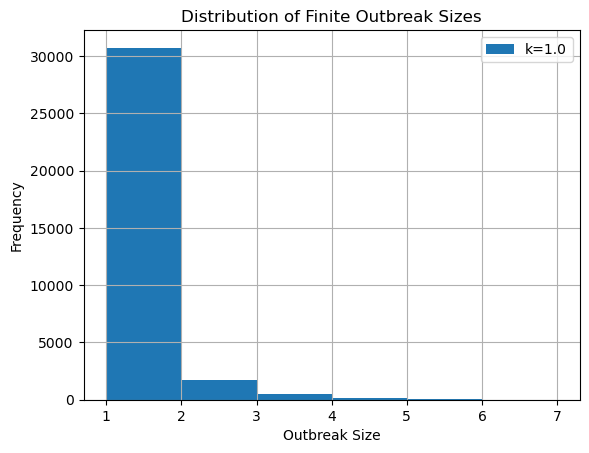

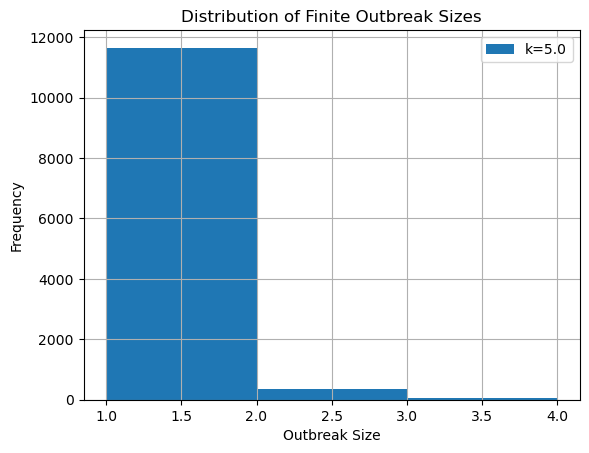

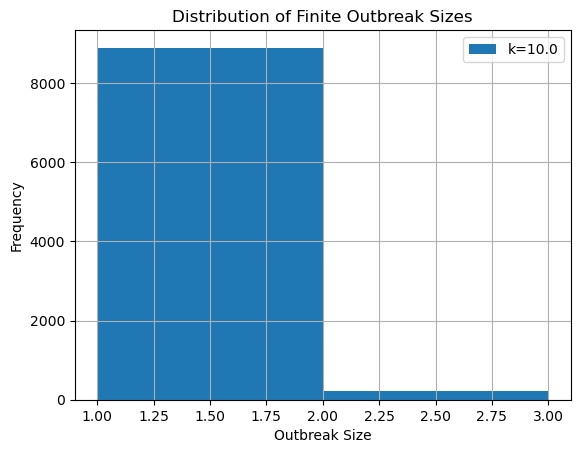

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

def simulate_branching_process_infections(R0, k, max_generations, num_simulations):
    mean = R0
    variance = mean + (mean**2) / k
    p = mean / variance
    n = mean**2 / (variance - mean)
    
    finite_outbreak_sizes = []
    for i in range(num_simulations):
        infections = 1  # Start with a single infection
        max_infections = infections
        for _ in range(max_generations):
            # negligible chance of dying out at 2^9 infections
            if infections > 2 ** 9:
                break
            # Simulate number of new infections in this generation
            new_infections = nbinom.rvs(n=n, p=p, size=infections)
            infections = new_infections.sum()  # Total number of new infections
            
            if infections > max_infections:
                max_infections = infections
            
            if infections == 0:
                finite_outbreak_sizes.append(max_infections)
                break  # Epidemic dies out


    return finite_outbreak_sizes

# Parameters
R0 = 3
k_values = [0.1, 0.5, 1.0, 5.0, 10.0]
max_generations = 1000
num_simulations = 100000

for k in k_values:
    outbreak_sizes = simulate_branching_process_infections(R0, k, max_generations, num_simulations)
    # Plot histogram
    plt.hist(outbreak_sizes, bins=range(1, max(outbreak_sizes)), alpha=1, label=f"k={k}")

    # Set plot labels and title
    plt.xlabel("Outbreak Size")
    plt.ylabel("Frequency")
    plt.title("Distribution of Finite Outbreak Sizes")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()
    plt.close()